## Logistic Regression(binary classification)

지도학습에서 데이터의 label이 0 혹은 1로 설정
이런 데이터는 기존의 선형회귀방식으로는 학습하고 prediction 불가능
##### 가설을 바꿈
기존가설 H = Wx + b 다중선형회귀에서 사용한 가설 -> 직선
직선이 아닌 0에서 1 사이의 값을 가지는 함수로 가설을 표현
sigmoid 함수를 이용해서 표현

In [ ]:
### 가설이 변경됐기 때문에 해당 가설을 이용한 cost함수를 이용하면 local minima를 찾게 될 여지가 있음.
#####cost함수도 변경
### cost = ylog(H)-(1-y)log(1-H)  ==> 수학식을 이용해서 cost 함수를

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-10,10,0.1)
print(x)

[-1.00000000e+01 -9.90000000e+00 -9.80000000e+00 -9.70000000e+00
 -9.60000000e+00 -9.50000000e+00 -9.40000000e+00 -9.30000000e+00
 -9.20000000e+00 -9.10000000e+00 -9.00000000e+00 -8.90000000e+00
 -8.80000000e+00 -8.70000000e+00 -8.60000000e+00 -8.50000000e+00
 -8.40000000e+00 -8.30000000e+00 -8.20000000e+00 -8.10000000e+00
 -8.00000000e+00 -7.90000000e+00 -7.80000000e+00 -7.70000000e+00
 -7.60000000e+00 -7.50000000e+00 -7.40000000e+00 -7.30000000e+00
 -7.20000000e+00 -7.10000000e+00 -7.00000000e+00 -6.90000000e+00
 -6.80000000e+00 -6.70000000e+00 -6.60000000e+00 -6.50000000e+00
 -6.40000000e+00 -6.30000000e+00 -6.20000000e+00 -6.10000000e+00
 -6.00000000e+00 -5.90000000e+00 -5.80000000e+00 -5.70000000e+00
 -5.60000000e+00 -5.50000000e+00 -5.40000000e+00 -5.30000000e+00
 -5.20000000e+00 -5.10000000e+00 -5.00000000e+00 -4.90000000e+00
 -4.80000000e+00 -4.70000000e+00 -4.60000000e+00 -4.50000000e+00
 -4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000e+00
 -4.00000000e+00 -3.90000

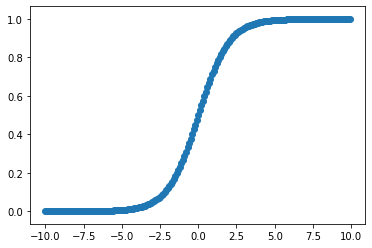

In [5]:
y = 1 / (1 + np.exp(-x))

# 시그모이드 함수

plt.scatter(x,y)
plt.show()

In [7]:
import tensorflow as tf
#사용할 데이터는 공부기간 어학연수기간 시험성적


In [37]:
# training data set
x_data = [[1,1],
         [2,0],
         [5,1],
         [5,1],
         [3,3],
         [8,1],
         [10,0]]
y_data = [[0],[0],[0],[1],[1],[1],[1]]

# placeholder
X = tf.placeholder(shape=[None,2],dtype = tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

                          
# Weight / bias
W = tf.Variable(tf.random_normal([2,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")
                          
# Hypothesis
logit = tf.matmul(X,W) + b # sigmoid를 이용해서 곡선으로 표현
H = tf.sigmoid(logit) #


# cost Function ( 일반적으로 텐서플로우에서 제공하는 함수를 이용)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits =  logit, labels =Y))

#T rain 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Session 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 학습

for step in range(3000):
    _, cost_val =  sess.run([train, cost], feed_dict =  {X:x_data,Y:y_data})
    if step % 300 == 0 :
        print("cost값은: {}".format(cost_val))
        
        
# predict
result = sess.run(H, feed_dict = {X: [[8,1]]})

if result > 0.5:
    print("시험에 통과: {}".format(result))
else:
    print("시험에떨어짐: {}".format(result))

cost값은: 1.1718705892562866
cost값은: 0.3176365792751312
cost값은: 0.2790791988372803
cost값은: 0.26033347845077515
cost값은: 0.2490604668855667
cost값은: 0.24143807590007782
cost값은: 0.23589208722114563
cost값은: 0.23165060579776764
cost값은: 0.2282881885766983
cost값은: 0.2255493402481079
시험에 통과: [[0.96883774]]


In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [103]:
## 대학원 입학시험 예측
## 데이터는 admission.csv
## logistic regression 수행 -> prediction 진행

df = pd.read_csv("C:/Users/student/Desktop/Python_Machine Learning/admission.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [44]:
x_data = df[["gre","gpa","rank"]]
x_data = MinMaxScaler().fit_transform(x_data)
y_data = df[["admit"]]
y_data = MinMaxScaler().fit_transform(y_data)

X = tf.placeholder(shape=[None,3],dtype = tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

logit = tf.matmul(X,W) + b 
H = tf.sigmoid(logit)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits =  logit, labels =Y))


optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)


sess = tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(3000):
    _, cost_val =  sess.run([train, cost], feed_dict =  {X:x_data,Y:y_data})
    if step % 300 == 0 :
        print("cost값은: {}".format(cost_val))
        
        
# predict
result = sess.run(H, feed_dict = {X: [[500,3.5,2]]})





# if result :
#     print("대학원 합격: {}".format(result))
# else:
#     print("대학원 불합격: {}".format(result))

cost값은: 0.9566769599914551
cost값은: 0.6904340982437134
cost값은: 0.6669344902038574
cost값은: 0.6571627259254456
cost값은: 0.6491552591323853
cost값은: 0.642081618309021
cost값은: 0.635796070098877
cost값은: 0.6302061676979065
cost값은: 0.6252318024635315
cost값은: 0.6208013296127319


In [ ]:
# 정확도 측정 accuracy

In [90]:
## 선생 답안
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [91]:
df = pd.read_csv("C:/Users/student/Desktop/Python_Machine Learning/admission.csv")
df.corr() # 상관관계 확인을 통해 전처리
# rank값을 조절해야함 --> 음의 상관관계
# 역순 정렬 ( 4 ->1 , 3 ->2, 2 ->3, 1->4)

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


In [92]:
def change_rank(k):
    if  k == 4:
        return 1
    elif k == 3:
        return 2
    elif k == 2:
        return 3
    elif k == 1:
        return 4


df["rank"] = df["rank"].apply(lambda x: change_rank(x))

In [93]:
# 결측치 처리
df.isnull().sum() # 결측치 없음

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [94]:
def process_outlier(tmp_df,tmp):
    q1,q3 = np.percentile(tmp,[25,75])
    iqr = q3 - q1
    upper = q3 + iqr * 1.5 # 상위임계치
    lower = q1 - iqr * 1.5 # 하위임계치
    upper_mask = tmp > upper
    lower_mask = tmp < lower
    
    result_mask = upper_mask | lower_mask
    return tmp_df[~result_mask]




In [95]:
# 이상치 처리
df = process_outlier(df,df["gre"])
df = process_outlier(df,df["gpa"])
df.shape

(395, 4)

In [100]:
# 머신러닝
x_data = df[["gre","gpa","rank"]].values
x_data = MinMaxScaler().fit_transform(x_data)
y_data = df["admit"].values.reshape(-1,1)

#플홀
X = tf.placeholder(shape = [None,3], dtype =tf.float32)
Y = tf.placeholder(shape = [None,1], dtype= tf.float32)

#
W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)


cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits =  logit, labels =Y))

ptimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)


sess = tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(30000):
    _, cost_val =  sess.run([train, cost], feed_dict =  {X:x_data,Y:y_data})
    if step % 300 == 0 :
        print("cost값은: {}".format(cost_val))


cost값은: 0.6634458899497986
cost값은: 0.6458544135093689
cost값은: 0.6410601735115051
cost값은: 0.637378990650177
cost값은: 0.6339752674102783
cost값은: 0.6307746767997742
cost값은: 0.6277612447738647
cost값은: 0.6249239444732666
cost값은: 0.6222521662712097
cost값은: 0.6197361946105957
cost값은: 0.6173667311668396
cost값은: 0.6151350140571594
cost값은: 0.613032877445221
cost값은: 0.6110523343086243
cost값은: 0.6091859936714172
cost값은: 0.6074270009994507
cost값은: 0.6057690382003784
cost값은: 0.6042056083679199
cost값은: 0.6027310490608215
cost값은: 0.6013401746749878
cost값은: 0.600027859210968
cost값은: 0.5987892746925354
cost값은: 0.5976197719573975
cost값은: 0.5965156555175781
cost값은: 0.5954726338386536
cost값은: 0.594487190246582
cost값은: 0.593555748462677
cost값은: 0.5926753282546997
cost값은: 0.591842770576477
cost값은: 0.591055154800415
cost값은: 0.5903100967407227
cost값은: 0.589604914188385
cost값은: 0.5889374017715454
cost값은: 0.5883051753044128
cost값은: 0.5877065658569336
cost값은: 0.587139368057251
cost값은: 0.5866017937660217
cost값은: 0.

In [101]:
## 정확도 측정(Accuracy)
## Test Data set 존재 X
# train dataset을 test data test로 사용

predict = tf.cast(H > 0.5, dtype =tf.float32)
correct = tf.equal(predict,Y) # TRUE, FALSE, TRUE, TRUE
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도: {}".format(sess.run(accuracy, feed_dict={X:x_data,Y:y_data})))

정확도: 0.701265811920166
